In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
X_train = np.load("X_train.npy")
X_test  = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test  = np.load("y_test.npy")

print("Datos cargados correctamente:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Datos cargados correctamente:
X_train: (39073, 108)
X_test: (9769, 108)


In [16]:
def build_deep_network(input_dim):
    model = Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(input_dim,)))

    # 10 capas ocultas, 10 neuronas cada una (sigmoide)
    for _ in range(10):
        model.add(layers.Dense(10, activation='sigmoid'))

    # Capa de salida
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Crear el modelo
input_dim = X_train.shape[1]
model_deep_10x10 = build_deep_network(input_dim)

model_deep_10x10.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │         1,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,091 (8.17 KB)

 Trainable params: 2,091 (8.17 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_deep_10x10.fit(
    X_train, y_train,
    validation_split=0.20,
    epochs=40,
    batch_size=32,
    callbacks=[early],
    verbose=1
)

Epoch 1/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6592 - loss: 0.6134 - val_accuracy: 0.7631 - val_loss: 0.5474
Epoch 2/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7661 - loss: 0.5409 - val_accuracy: 0.7631 - val_loss: 0.4054
Epoch 3/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8058 - loss: 0.3980 - val_accuracy: 0.8082 - val_loss: 0.3908
Epoch 4/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8050 - loss: 0.3819 - val_accuracy: 0.7816 - val_loss: 0.3886
Epoch 5/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7992 - loss: 0.3802 - val_accuracy: 0.8084 - val_loss: 0.3805
Epoch 6/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8176 - loss: 0.3714 - val_accuracy: 0.8252 - val_loss: 0.3659
Epoch 7/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8313 - loss: 0.3569 - val_accuracy: 0.8403 - val_loss: 0.3484
Epoch 8/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8466 - loss: 0.3390 - val_accuracy: 0.

In [19]:
# Predicciones
y_prob = model_deep_10x10.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("=== MÉTRICAS ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("\nMatriz de confusión:\n", cm)

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
=== MÉTRICAS ===
Accuracy: 0.8562800696079435
Precision: 0.74501573976915
Recall: 0.6073567151411463
F1 Score: 0.6691800188501413

Matriz de confusión:
 [[6945  486]
 [ 918 1420]]


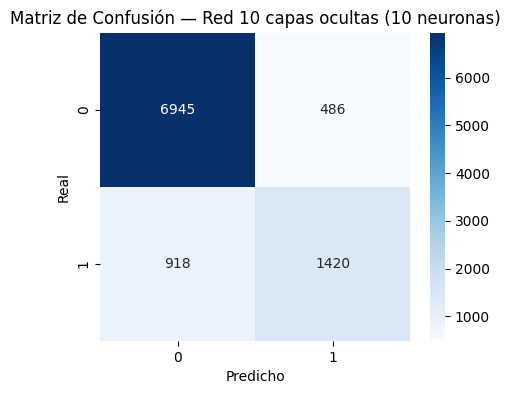

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión — Red 10 capas ocultas (10 neuronas)")
plt.show()

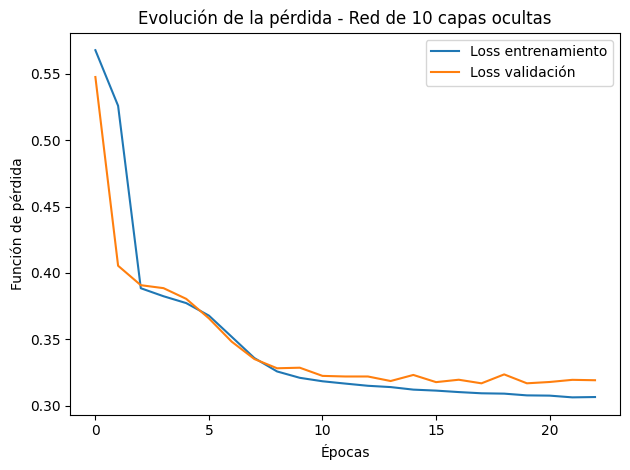

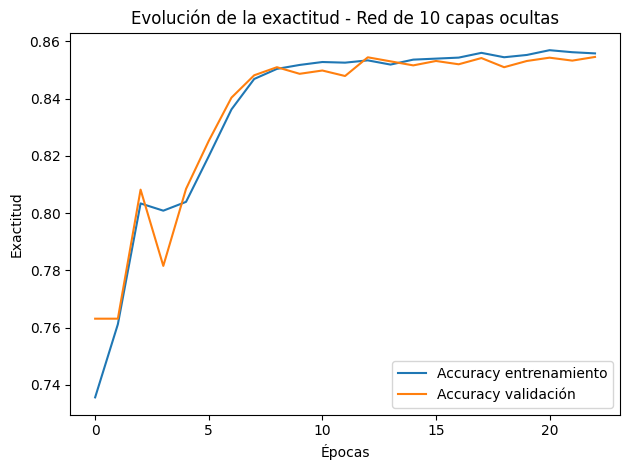

In [21]:
# ============================================================
# Celda 5: Gráficas de entrenamiento + matriz de confusión
# ============================================================

# Curvas de entrenamiento: pérdida (loss)
plt.figure()
plt.plot(history.history["loss"], label="Loss entrenamiento")
plt.plot(history.history["val_loss"], label="Loss validación")
plt.xlabel("Épocas")
plt.ylabel("Función de pérdida")
plt.title("Evolución de la pérdida - Red de 10 capas ocultas")
plt.legend()
plt.tight_layout()
plt.show()

# Curvas de entrenamiento: exactitud (accuracy)
plt.figure()
plt.plot(history.history["accuracy"], label="Accuracy entrenamiento")
plt.plot(history.history["val_accuracy"], label="Accuracy validación")
plt.xlabel("Épocas")
plt.ylabel("Exactitud")
plt.title("Evolución de la exactitud - Red de 10 capas ocultas")
plt.legend()
plt.tight_layout()
plt.show()

